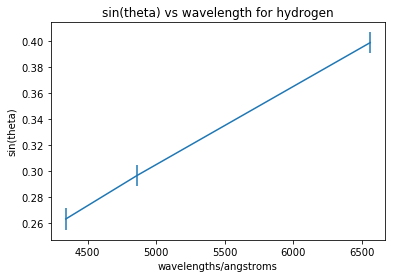

Hydrogen: 1.6440608906354632e-06



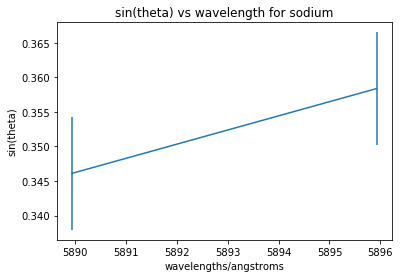

Sodium: 4.876379427620118e-08



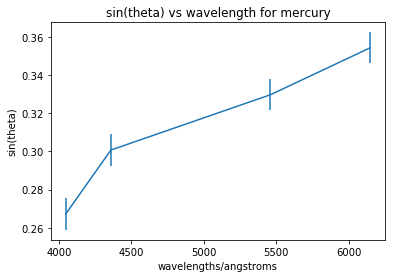

Mercury: 2.6757468620397902e-06



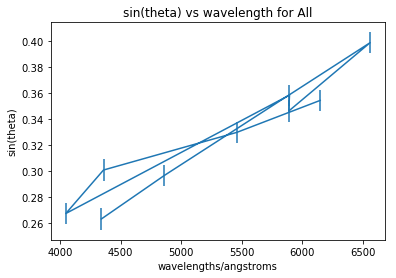

All: 2.078757508575815e-06



In [26]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    
    f = open("data.txt", "r")
    fnew = open("GratingSpacing.txt", "w")
    fnew.write("The following are the values for the  diffraction grating spacing obtained after testing with each respective gas, given in meters\n")

    for i in range(0, 4):
        str = f.readline()
        dataList = str.split()
        lamdas = []
        thetas = []
        sin_thetas = []
        for j in range(0, len(dataList)):
            if j % 2 == 0:
                lamda = float(dataList[j])
                lamdas.append(lamda)
            else:
                theta = float(dataList[j])
                thetas.append(theta)
        for c in range(len(thetas)):
            sin_thetas.append(np.sin(thetas[c]* np.pi/180.0))
        y_data = np.array(sin_thetas)
        x_data = np.array(lamdas)

#         plt.plot(x_data, y_data)
        plt.figure()
        plt.ylabel("sin(theta)")
        plt.xlabel("wavelengths/angstroms")
        

        arr = np.polyfit(x_data, y_data, 1)
        d = (1/arr[0]) * (10**-10)
        

        if i == 0:
            strLine = "Hydrogen: {}".format(d)
            gasName = "hydrogen"
        if i == 1:
            strLine = "Sodium: {}".format(d)
            gasName = "sodium"
        if i == 2:
            strLine = "Mercury: {}".format(d)
            gasName = "mercury"
        if i == 3:
            strLine = "All: {}".format(d)
            gasName = "All"    
            

        strLine = strLine + "\n"
        plt.title("sin(theta) vs wavelength for " + gasName)

        plt.errorbar(x_data, y_data, xerr = 0., yerr = (0.5* np.pi/180) * np.cos(np.array(thetas)*np.pi/180))
        plt.show()

        fnew.write(strLine)
        
        print (strLine)
        
    f.close()
    fnew.close()

main()
        